# 绘制一个中文的词云

## 1. 准备一个中文文本

如果要显示中文的词图，首先文本必须是中文的，例如路径'datasets/news_sample01.txt'的中文新闻稿：

In [1]:
f = open('datasets/news_sample01.txt', 'r', encoding='utf-8')
text = f.read()
text = text.replace('\n', ' ')  #删除换行符
text[:30]

'人民币国际化稳步向前 今年一季度人民币跨境结算规模稳步扩大 '

## 2. 准备分词工具

这里使用jieba库来进行中文分词，如何使用jieba，参加本章节下课件：[附录：中文文本分析.ipynb](附录：中文文本分析.ipynb)

In [2]:
import jieba
words_list = jieba.cut(text)
words_list = list(words_list)
text = ' '.join(words_list)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/sv/xyzb31jx2zz1ns_qr3d7hy700000gn/T/jieba.cache
Loading model cost 0.290 seconds.
Prefix dict has been built successfully.


## 3. 准备一个白底的图形

在网上下载图片，例如在搜索引擎上搜索“人民币+图标+白底”:  
<img src="image/rmb.png" alt="image/rmb.png" width="150">  
使用修改的图片的软件修改图片大小，在保证宽*高比不变的情况下，宽改成1500pixels，避免图片过大或者过小。

读取准备好的图形，作为掩码的形状。然后使用imageio库来读取图片。

In [3]:
import imageio.v2 as imageio
mask_img = imageio.imread('image/rmb.png')
print('图片大小：', mask_img.shape)  

图片大小： (1500, 1500, 4)


## 4. 准备颜色

以CSS颜色为例，

<img src="image/sphx_glr_named_colors_003.png" alt="image/sphx_glr_named_colors_003.png" width="600">  

选择一个色系，例如'purple',

In [4]:
from wordcloud import get_single_color_func
color_func = get_single_color_func('purple')

## 5. 指定中文字体路径

接着，需要指定WordCloud类的参数font_path为一个中文字体路径。如何找到自己电脑中的中文字体路径呢？参照本章节[附录：中文字体和中文显示.ipynb](附录：中文字体和中文显示.ipynb)

In [5]:
from wordcloud import WordCloud
wc = WordCloud(
              font_path='/System/Library/Fonts/Supplemental/Songti.ttc', 
              mask=mask_img,
              max_words=200,
              max_font_size=100,
              min_font_size=10,
              width=1500,
              height=1500,
              background_color="white", 
               color_func=color_func,
              repeat=True)
wc.generate(text)

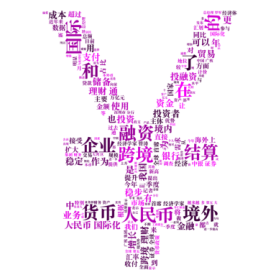

In [6]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

plt.imshow(wc)
plt.axis("off")
plt.savefig("image/ciyun_cn.jpg", dpi=500) # 或者保存成.png .svg .pdf .eps等
plt.show()